## **Naïve Bayes Classifier Algorithm**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="darkgrid")

### **Data Loading and Inspection**


In [3]:
data = pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.sample(5, random_state=42)

,Age,EstimatedSalary,Purchased
209,46,22000,0
280,59,88000,1
33,28,44000,0
210,48,96000,1
93,29,28000,0


In [5]:
data.shape

(400, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


### **Exploratory Data Analysis (EDA)**


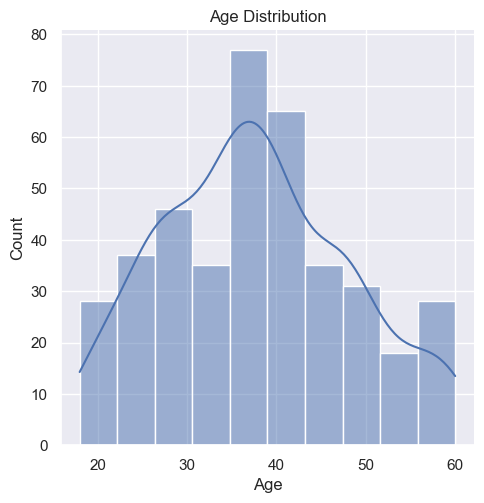

In [9]:
sns.displot(data=data, x="Age", kde=True, bins=10)
plt.title("Age Distribution")
plt.show()

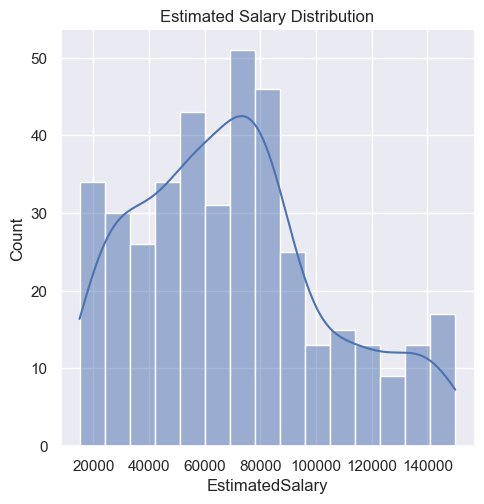

In [10]:
sns.displot(data=data, x="EstimatedSalary", kde=True, bins=15)
plt.title("Estimated Salary Distribution")
plt.show()

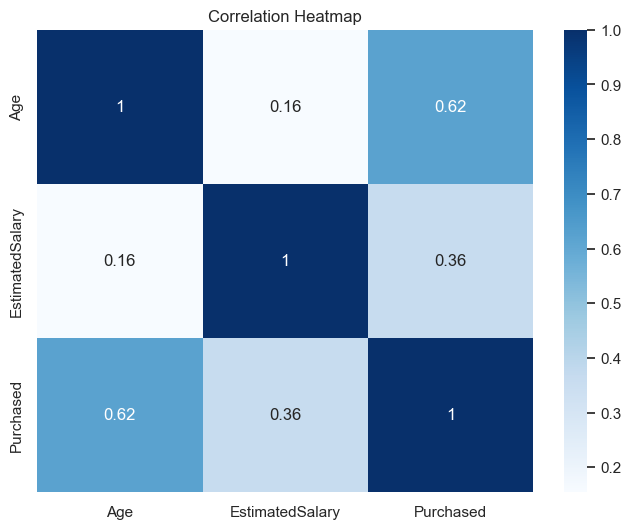

In [11]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

### **Data Preparation**


**Split the dataset into features and target variable**


In [12]:
X = data.drop("Purchased", axis=1)
y = data["Purchased"]

**Split the data into training and testing sets**


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values,
    y.values,
    test_size=0.33,
    random_state=42,
    stratify=y,
)

In [14]:
X.shape, X_train.shape, X_test.shape

((400, 2), (268, 2), (132, 2))

### **Feature Scaling**


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Training Naïve Bayes Classifier Algorithm**


In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [19]:
naive_bayes_clf = GaussianNB()
naive_bayes_clf.fit(X_train, y_train)

GaussianNB()

### **Making Predictions And Evaluating The Model**


In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
# Predictions on training data
y_train_pred = naive_bayes_clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8880597014925373

In [22]:
# Predictions on testing data
y_test_pred = naive_bayes_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8787878787878788

### **Confusion Matrix**


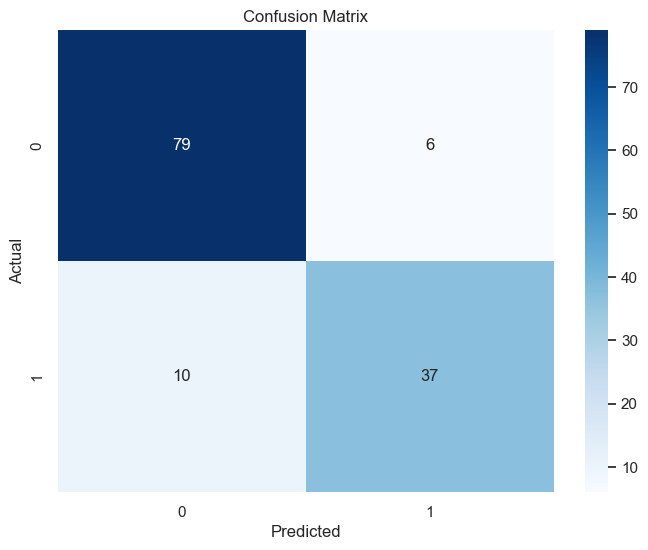

In [23]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        85
           1       0.86      0.79      0.82        47

    accuracy                           0.88       132
   macro avg       0.87      0.86      0.87       132
weighted avg       0.88      0.88      0.88       132



### **Plot decision boundaries for the training and testing data**


In [30]:
def plot_decision_boundary(model, X, y, scaler=None, title=None, step_size=0.5):
    if scaler != None:
        X = scaler.inverse_transform(X)
    y = y.ravel()

    x_range, y_range = np.median(X[:, 0]) / 4, np.median(X[:, 1]) / 4
    x_min, x_max = X[:, 0].min() - x_range, X[:, 0].max() + x_range
    y_min, y_max = X[:, 1].min() - y_range, X[:, 1].max() + y_range

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)
    )

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if scaler == None:
        Z = model.predict(grid_points).reshape(xx.shape)
    else:
        Z = model.predict(scaler.transform(grid_points)).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap="Paired", alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="k")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("Decision Boundary with Data Points" if title == None else title)
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.legend()
    plt.grid(False)
    plt.show()

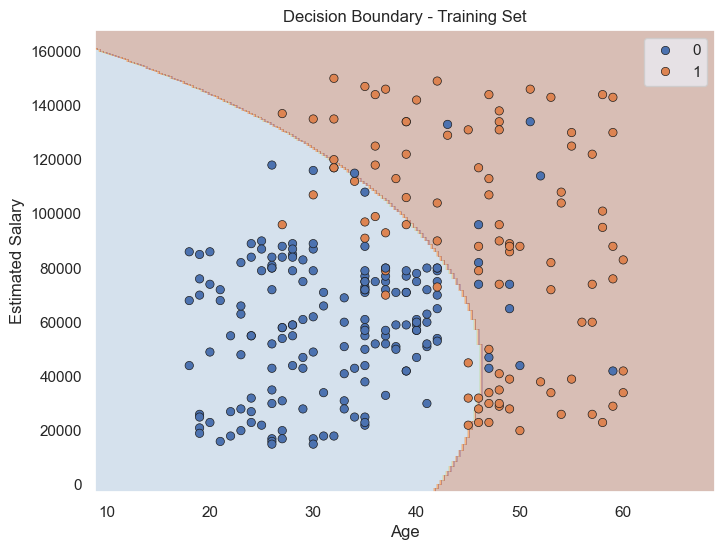

In [32]:
plot_decision_boundary(
    naive_bayes_clf,
    X_train,
    y_train,
    scaler=sc,
    title="Decision Boundary - Training Set",
    step_size=0.3,
)

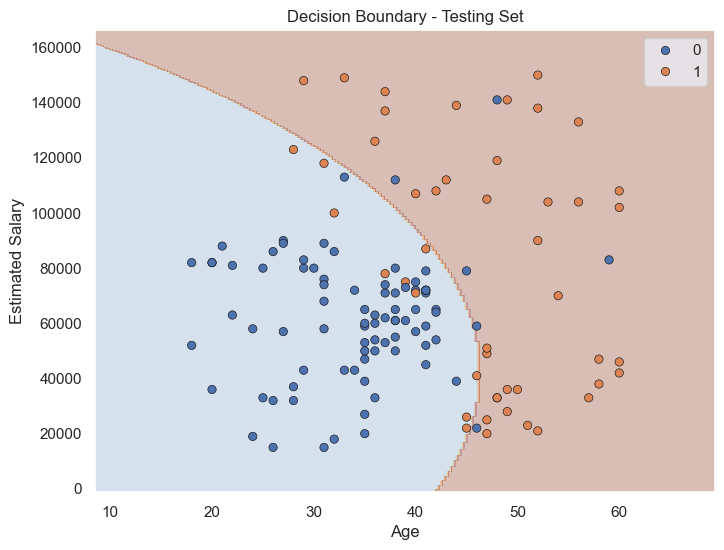

In [33]:
plot_decision_boundary(
    naive_bayes_clf,
    X_test,
    y_test,
    scaler=sc,
    title="Decision Boundary - Testing Set",
    step_size=0.3,
)